## Simulate 1000 games of War, 2-player, to see how long it takes

The card game called "War" is a notorious way to kill time without thinking too much.  There is no point where a player gets to make a decision that alters the outcome.  Yet it can drag on seemingly forever, creating the illusion that something actually happened.  How long would a 2-player game be expected to last?  You could measure the number of times players need to shuffle the cards they've won in order to replenish their empty hands.  That's one of the most annoying parts of any card game, and as such, may provide a good measure of the agony of "War".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_shuffle = []
n_battles = []
deck = np.append(np.repeat(range(13), 4), [13, 13]) # add two 13's for Jokers

In [3]:
def war(deck, seed=0):
    np.random.seed(seed)
    cards = len(deck)
    deck = list(deck)
    np.random.shuffle(deck)
    shufs = 1
    battles = 0
    hand1 = deck[:int(cards/2)]
    hand2 = deck[int(cards/2):]
    discard1 = []
    discard2 = []
    
    while (hand1 or discard1) and (hand2 or discard2):
        battles += 1
        i = 1  # find the index that will determine the winner of the battle
        if not hand1:  # shuffle the cards won so far, to refill an empty hand
            np.random.shuffle(discard1)
            shufs += 1
            hand1 = discard1[:]
            discard1 = []
        if not hand2:
            np.random.shuffle(discard2)
            shufs += 1
            hand2 = discard2[:]
            discard2 = []
            
        smallhand = min(len(hand1), len(hand2))
        
        while i <= smallhand and hand1[-i] == hand2[-i]:  # in case of wars
            i += 4
            battles += 1
            if len(hand1) < i: 
                np.random.shuffle(discard1)
                hand1 = discard1 + hand1
                shufs += 1
                discard1 = []
                smallhand = min(len(hand1), len(hand2))
            if len(hand2) < i: 
                np.random.shuffle(discard2) 
                hand2 = discard2 + hand2
                shufs += 1
                discard2 = []
                smallhand = min(len(hand1), len(hand2))
        i = min(smallhand, i)  # in case someone has all cards in on epic war
        if hand1[-i] == hand2[-i]: # tie, send all cards back where they came from
            discard1.extend(hand1[-i:])
            discard2.extend(hand2[-i:])
        elif hand1[-i] > hand2[-i]:
            discard1.extend(hand1[-i:] + hand2[-i:])
        else:
            discard2.extend(hand1[-i:] + hand2[-i:])
        
        hand1 = hand1[:-i]
        hand2 = hand2[:-i]
        
    return shufs, battles
    

In [4]:
# 1000 simulated games

n_sims = 1000

for s in range(n_sims):
    shuf, bat = war(deck[:], s)
    n_shuffle.append(shuf)
    n_battles.append(bat)

In [5]:
print(f"The average number of shuffles per game was {round(np.mean(n_shuffle), 2)}")

The average number of shuffles per game was 37.06


In [6]:
print(f"The average number of battles per game was {round(np.mean(n_battles), 2)}")

The average number of battles per game was 322.4


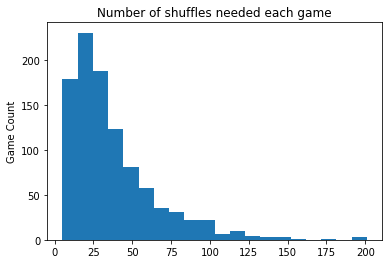

In [7]:
plt.hist(n_shuffle, bins=20)
plt.title("Number of shuffles needed each game")
plt.ylabel("Game Count");